# Air Quality Prediction Using Random Forest Regressor

- https://en.tutiempo.net/climate  Using this website builded the Webscrapping with the library of beautyfulsoup


In this Project Scrapping the data from the website and after taken data we calcluated the daily hours Air Qulaity data into daily average data of 2013 to 2017  for target value  PM2.5 after We Predicting the Air Quality using Ridge and Lasso Regression and also comparison between previous model Linear Regression and get which is the best for this usecase

Columns
- T	Average annual temperature
- TM	Annual average maximum temperature
- Tm	Average annual minimum temperature
- PP	Rain or snow precipitation total annual
- V	Annual average wind speed
- RA	Number of days with rain
- SN	Number of days with snow
- TS	Number of days with storm
- FG	Number of foggy days
- TN	Number of days with tornado
- GR	Number of days with hail

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the data 
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,239.695455
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,264.064286
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
# Drop the Null Values If incase dataset have but there is no null values thats good
df=df.dropna()

In [5]:
# Lets Assign the features into two types independent and dependent features
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

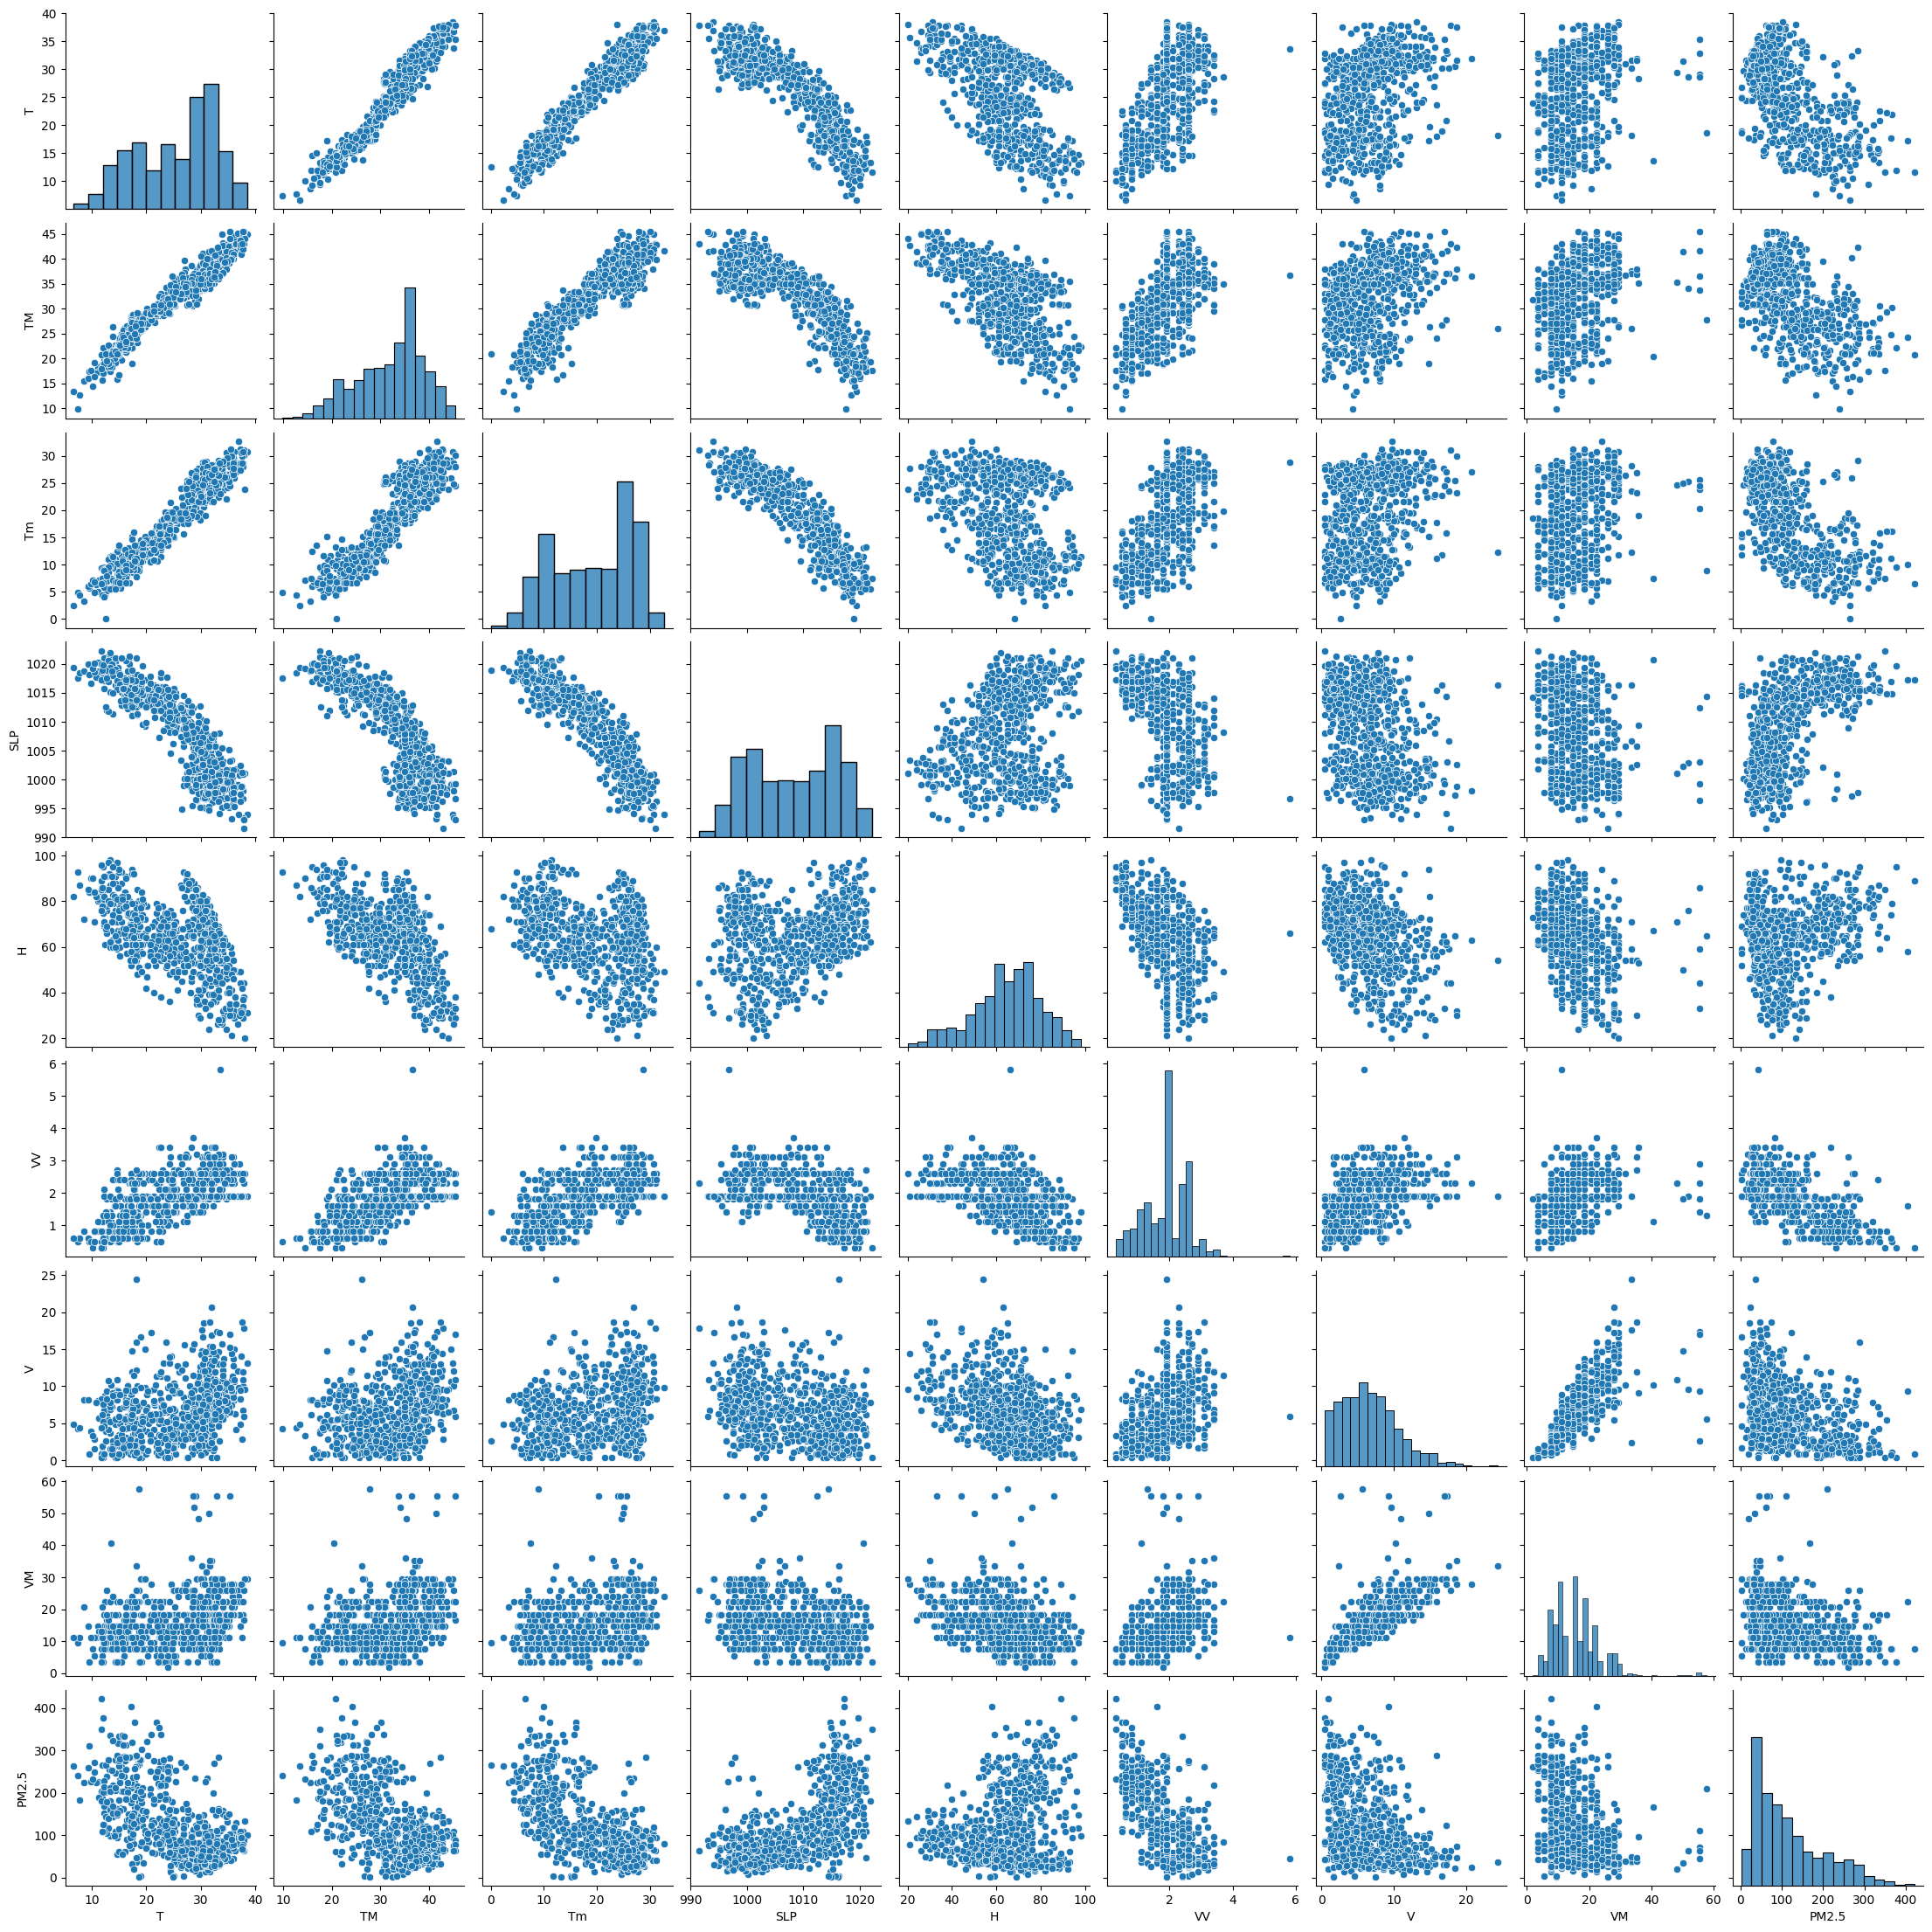

In [7]:
# Using seaborn checking the correlation between the features
sns.pairplot(df)

In [8]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
T,1.000000,0.967240,0.959884,-0.886908,-0.516750,0.617282,0.322878,0.284529,-0.632417
TM,0.967240,1.000000,0.897476,-0.831634,-0.598224,0.593582,0.315786,0.296115,-0.572368
Tm,0.959884,0.897476,1.000000,-0.910859,-0.316035,0.554891,0.308353,0.256253,-0.673843
SLP,-0.886908,-0.831634,-0.910859,1.000000,0.278143,-0.488694,-0.341968,-0.296589,0.623239
H,-0.516750,-0.598224,-0.316035,0.278143,1.000000,-0.474931,-0.404186,-0.371596,0.181546
VV,0.617282,0.593582,0.554891,-0.488694,-0.474931,1.000000,0.400951,0.346301,-0.643575
V,0.322878,0.315786,0.308353,-0.341968,-0.404186,0.400951,1.000000,0.760903,-0.364943
VM,0.284529,0.296115,0.256253,-0.296589,-0.371596,0.346301,0.760903,1.000000,-0.302374
PM2.5,-0.632417,-0.572368,-0.673843,0.623239,0.181546,-0.643575,-0.364943,-0.302374,1.000000


### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [9]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

## Train Test split

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
# regressor=RandomForestRegressor()
regressor = RandomForestRegressor(
    n_estimators=300, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=10, 
    random_state=0
)


In [62]:

regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=300, random_state=0)

In [63]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.7687285246080041


In [64]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6369277986886266


In [65]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)


In [66]:
score.mean()

np.float64(0.553175619627493)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [4, 8, 10, 12]
}


In [68]:

# Initialize the model
rf = RandomForestRegressor(random_state=0)


In [69]:

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,  
    verbose=2
)


In [70]:

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [4, 8, 10, 12],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [71]:

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model from GridSearchCV
best_rf = grid_search.best_estimator_


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [72]:

# Evaluate the best model
train_r2 = best_rf.score(X_train, y_train)
test_r2 = best_rf.score(X_test, y_test)
cv_score = grid_search.best_score_

print("Train R²:", train_r2)
print("Test R²:", test_r2)
print("Cross-Validation R²:", cv_score)


Train R²: 0.8603735213184576
Test R²: 0.6323472748244765
Cross-Validation R²: 0.6670332549890172


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = best_rf.predict(X_test)

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 33.1296
Mean Squared Error (MSE): 2500.7461
Root Mean Squared Error (RMSE): 50.0075
R² Score: 0.6323


# Feature Selection (Remove Low-Importance Features)

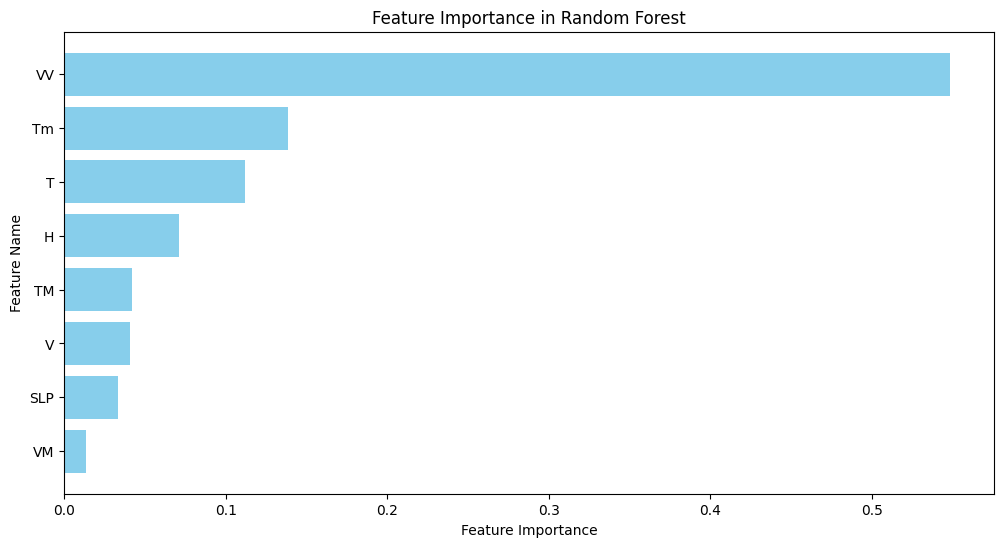

  Feature  Importance
5      VV    0.548290
2      Tm    0.138785
0       T    0.112174
4       H    0.071045
1      TM    0.041886
6       V    0.040637
3     SLP    0.033437
7      VM    0.013746


In [74]:
# Get feature importances
feature_importance = best_rf.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort by importance and visualize
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Print feature importance values
print(features_df)


## Dropping not important variable 

In [75]:
# Drop 'VM' column from dataset
X_new = X.drop(columns=['VM'])  # Remove VM from features

# Train-Test Split (keeping same data split)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

# Retrain best_rf on the updated dataset
best_rf.fit(X_train_new, y_train)

# Predictions
y_pred_new = best_rf.predict(X_test_new)

# Performance Metrics
mae_new = mean_absolute_error(y_test, y_pred_new)
mse_new = mean_squared_error(y_test, y_pred_new)
rmse_new = np.sqrt(mse_new)
r2_new = r2_score(y_test, y_pred_new)

# Print Results
print(f"Mean Absolute Error (MAE): {mae_new:.4f}")
print(f"Mean Squared Error (MSE): {mse_new:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_new:.4f}")
print(f"R² Score: {r2_new:.4f}")

Mean Absolute Error (MAE): 33.0760
Mean Squared Error (MSE): 2475.7848
Root Mean Squared Error (RMSE): 49.7573
R² Score: 0.6360


In [87]:
X_test_new

,T,TM,Tm,SLP,H,VV,V
555,16.6,22.2,10.2,1015.4,65.0,1.8,10.0
481,28.8,34.4,25.3,1001.7,88.0,1.6,1.7
367,10.4,19.2,4.8,1018.6,71.0,0.8,2.8
179,15.4,19.7,11.6,1016.0,93.0,0.6,4.4
657,28.3,35.8,26.8,1003.9,89.0,1.6,4.3
...,...,...,...,...,...,...,...
698,26.4,33.0,18.4,1012.4,60.0,2.6,4.6
272,37.9,43.0,31.0,991.5,44.0,2.3,17.8
477,28.4,32.6,25.4,1002.7,77.0,1.9,0.9
276,34.7,39.9,28.8,1001.5,55.0,1.9,9.4


In [77]:
df2 = df

In [79]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming df2 is your dataset
df2['Temp_Diff'] = df2['TM'] - df2['Tm']
df2['H_SLP_Ratio'] = df2['H'] / df2['SLP']
df2['Wind_Interaction'] = df2['VV'] * df2['V']

# Dropping 'VM' since we found it to be less important
df2.drop(columns=['VM'], inplace=True)

# Scale the new features
scaler = StandardScaler()
df2[['Temp_Diff', 'H_SLP_Ratio', 'Wind_Interaction']] = scaler.fit_transform(df2[['Temp_Diff', 'H_SLP_Ratio', 'Wind_Interaction']])

# Check new feature importance
X = df2.drop(columns=['PM2.5'])  # Target column
y = df2['PM2.5']

# Retrain Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Use the best parameters from hyperparameter tuning
best_rf = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=5, min_samples_leaf=10, random_state=0)
best_rf.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 31.3297
Mean Squared Error (MSE): 2346.4919
Root Mean Squared Error (RMSE): 48.4406
R² Score: 0.6550


In [88]:
df2

,T,TM,Tm,SLP,H,VV,V,PM2.5,Temp_Diff,H_SLP_Ratio,Wind_Interaction
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,239.695455,-2.405475,1.829113,-1.105942
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,182.187500,-1.407374,1.433554,-1.058026
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,264.064286,-0.590747,1.103672,-1.034557
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,223.208333,-0.227801,0.457112,-0.682525
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,200.645833,1.072754,-0.252673,-0.210214
...,...,...,...,...,...,...,...,...,...,...,...
726,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,288.416667,-0.046328,-0.571408,1.482476
727,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,256.833333,0.407354,-0.703262,0.797968
728,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,169.000000,0.044408,1.975138,-0.805736
729,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,186.041667,0.074654,0.856222,-0.520198


# XGBoost

In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize XGBoost Regressor with default parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


Mean Absolute Error (MAE): 36.3085
Mean Squared Error (MSE): 2811.7365
Root Mean Squared Error (RMSE): 53.0258
R² Score: 0.5866


# Hyperparameter tuning on XGBoost

In [81]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1]
}

# Initialize XGBoost
xgb_tuned = XGBRegressor(objective='reg:squarederror', random_state=0)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions with best model
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluation
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_best_xgb = np.sqrt(mse_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print(f"Best XGBoost Model:")
print(f"Mean Absolute Error (MAE): {mae_best_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_best_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_best_xgb:.4f}")
print(f"R² Score: {r2_best_xgb:.4f}")


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best XGBoost Model:
Mean Absolute Error (MAE): 31.3413
Mean Squared Error (MSE): 2291.5216
Root Mean Squared Error (RMSE): 47.8698
R² Score: 0.6631


# Feature Engineering on XGBoost

In [82]:
from sklearn.preprocessing import PolynomialFeatures

# Creating interaction and polynomial terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Convert to DataFrame
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly.get_feature_names_out(X_train.columns))
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_test.columns))

# Train XGBoost on engineered features
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_xgb = XGBRegressor(
    colsample_bytree=0.7, 
    learning_rate=0.01, 
    max_depth=3, 
    n_estimators=500, 
    subsample=0.8,
    random_state=42
)

best_xgb.fit(X_train_poly_df, y_train)

# Predictions
y_pred = best_xgb.predict(X_test_poly_df)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 31.6854
Mean Squared Error (MSE): 2362.6674
Root Mean Squared Error (RMSE): 48.6073
R² Score: 0.6526


# KNN 

In [84]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize and train the model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Predictions
knn_predictions = knn.predict(X_test)

# Evaluation Metrics
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test, knn_predictions)

print(f"Mean Absolute Error (MAE): {knn_mae:.4f}")
print(f"Mean Squared Error (MSE): {knn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.4f}")
print(f"R² Score: {knn_r2:.4f}")

# Hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean
}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_knn = grid_search.best_estimator_

# Predictions with best model
best_knn_predictions = best_knn.predict(X_test)

# Recalculate evaluation metrics
best_knn_mae = mean_absolute_error(y_test, best_knn_predictions)
best_knn_mse = mean_squared_error(y_test, best_knn_predictions)
best_knn_rmse = np.sqrt(best_knn_mse)
best_knn_r2 = r2_score(y_test, best_knn_predictions)

print("\nBest Parameters:", grid_search.best_params_)
print(f"Best KNN Model:")
print(f"Mean Absolute Error (MAE): {best_knn_mae:.4f}")
print(f"Mean Squared Error (MSE): {best_knn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {best_knn_rmse:.4f}")
print(f"R² Score: {best_knn_r2:.4f}")


Mean Absolute Error (MAE): 39.6141
Mean Squared Error (MSE): 2952.9129
Root Mean Squared Error (RMSE): 54.3407
R² Score: 0.5659

Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best KNN Model:
Mean Absolute Error (MAE): 37.6572
Mean Squared Error (MSE): 2712.2366
Root Mean Squared Error (RMSE): 52.0791
R² Score: 0.6013


In [85]:
import pickle

# Save the best Random Forest model
with open("best_random_forest.pkl", "wb") as f:
    pickle.dump(best_rf, f)

# Save the best XGBoost model
with open("best_xgboost.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

print("Models saved successfully!")

Models saved successfully!
